In [14]:
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [15]:
# To save figures
PROJECT_ROOT_DIR = 'D:\Machine Learning\Hands-On-Machine-Learning\Projects\end-to-end-ml-model'
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH,fig_id + "."  + fig_extension)
    print("Saving Figure...")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)




In [16]:
import pandas as pd
FULL_DATASET_PATH = 'dataset/car_details.csv'

def load_titanic_data(full_path=FULL_DATASET_PATH):
    return pd.read_csv(full_path)

In [17]:
car_details = load_titanic_data()
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Saving Figure...


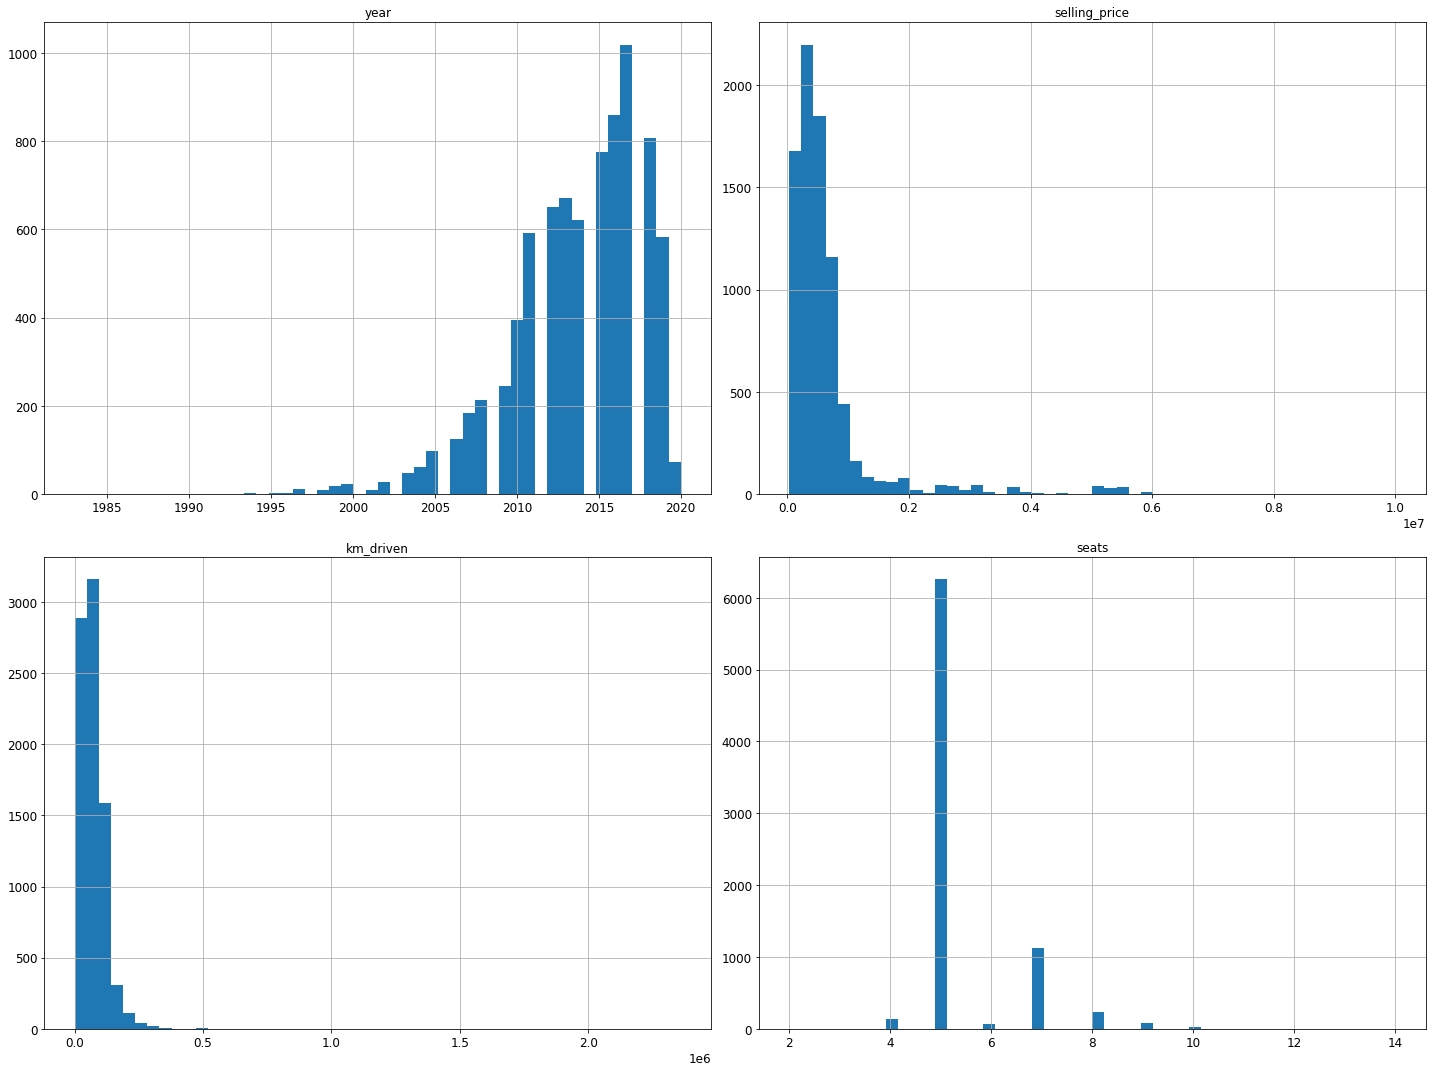

In [13]:
# plotting histograms for all attributes
car_details.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [60]:
# function to convert string columns to float
def convert_object_to_digit(dataframe, columns_to_convert, convert_type):
    copy_dataframe = dataframe.copy()
    for i in columns_to_convert:
        copy_dataframe[i] = pd.to_numeric(copy_dataframe[i].str.extract(r'(\d*\.\d+|\d+)', expand=False)).astype(convert_type)
    return copy_dataframe

In [65]:
float_colums_to_convert = ['max_power', 'mileage', 'engine']

new_car_details = convert_object_to_digit(car_details, float_colums_to_convert, float)
new_car_details.info()
new_car_details.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


Saving Figure...


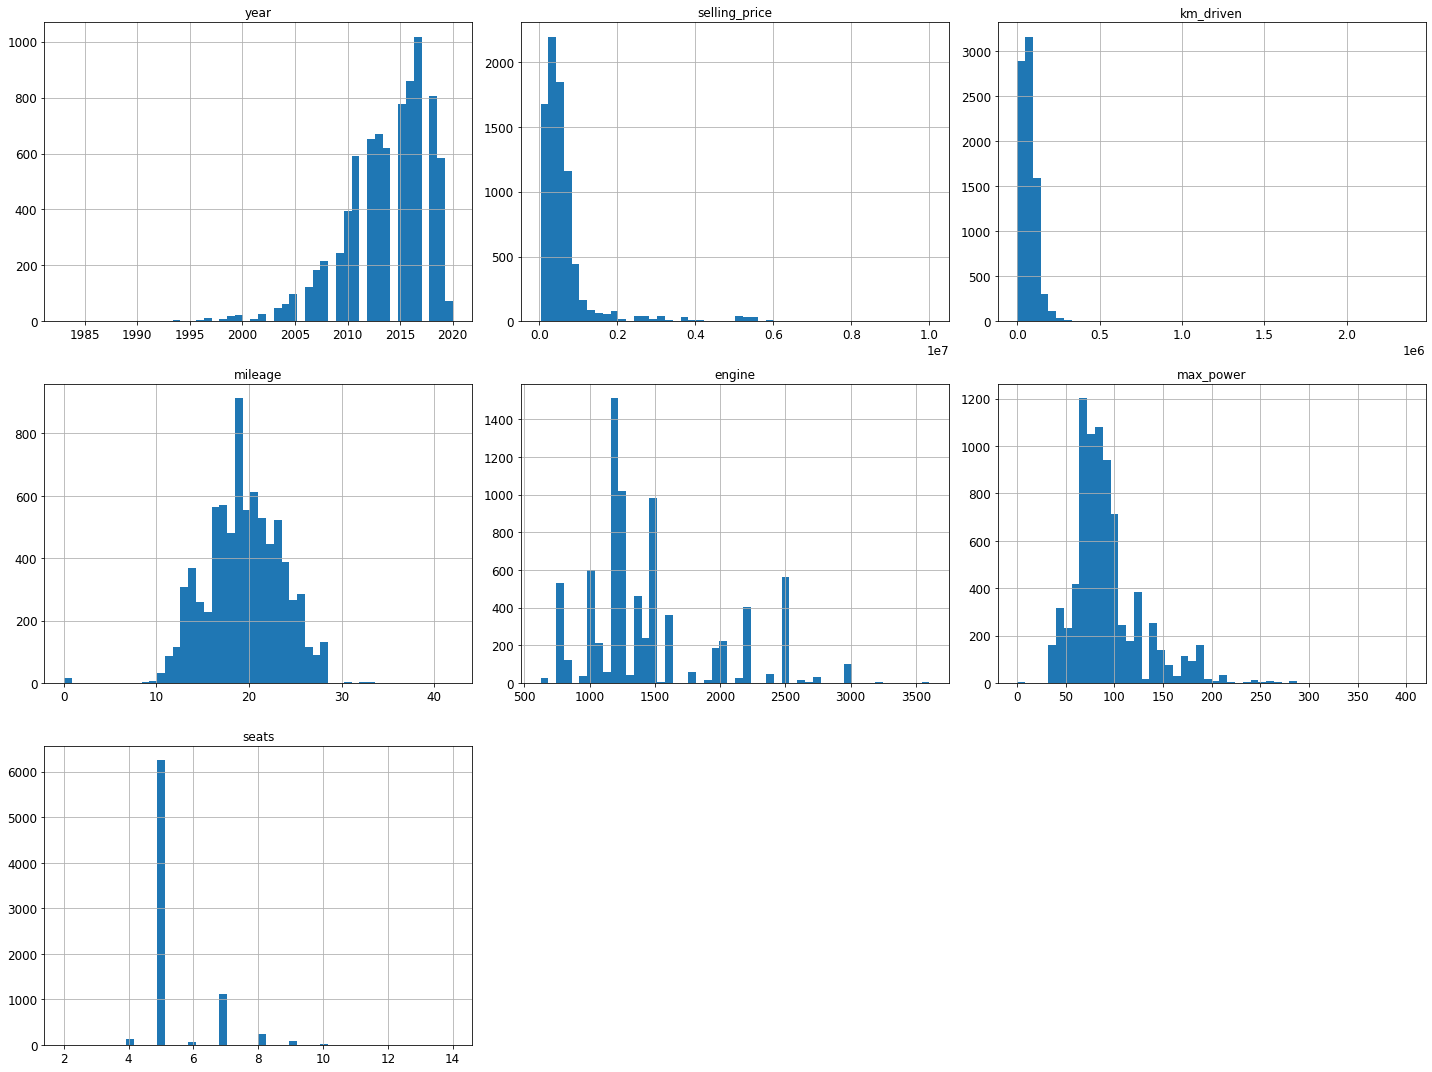

In [67]:
new_car_details.hist(bins=50, figsize=(20,15))
save_fig("new_attribute_histogram_plots")
plt.show()

<AxesSubplot:>

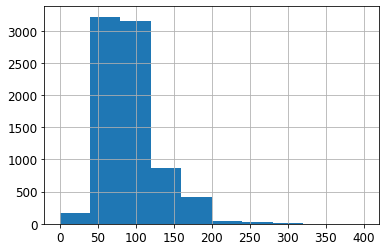

In [68]:
new_car_details['max_power'].hist()


In [69]:
# applying stratified sampling to 'max_power'

# new_car_details['max_power_cat'] = pd.cut(new_car_details['max_power'],
#                                           bins=[0, 50, 100,150,200,np.inf],
#                                           labels=[1,2,3,4,5])

<AxesSubplot:>

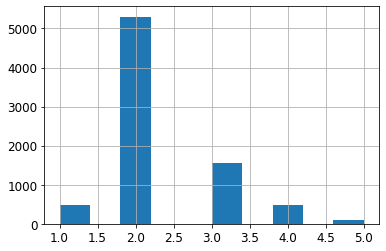

In [72]:
new_car_details['max_power_cat'].value_counts()
new_car_details['max_power_cat'].hist()

In [75]:
# removing useless/hard attributes
new_car_details.drop('torque',axis=1)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_power_cat
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,2
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,3
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,2
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,2
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,2
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,3
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,2
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,2


In [81]:
new_car_details.isnull().sum().sum()

clean_car_details = new_car_details.dropna()
clean_car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           7906 non-null   object  
 1   year           7906 non-null   int64   
 2   selling_price  7906 non-null   int64   
 3   km_driven      7906 non-null   int64   
 4   fuel           7906 non-null   object  
 5   seller_type    7906 non-null   object  
 6   transmission   7906 non-null   object  
 7   owner          7906 non-null   object  
 8   mileage        7906 non-null   float64 
 9   engine         7906 non-null   float64 
 10  max_power      7906 non-null   float64 
 11  torque         7906 non-null   object  
 12  seats          7906 non-null   float64 
 13  max_power_cat  7906 non-null   category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 872.6+ KB


In [83]:
clean_car_details.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_cat
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,2
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,3
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,2
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,2
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,2


<AxesSubplot:>

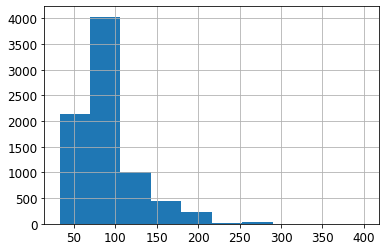

In [90]:
clean_car_details['max_power'].hist()

In [91]:
# applying stratified sampling to the new data
clean_car_details['max_power_cat'] = pd.cut(clean_car_details['max_power'],
                                          bins=[0, 50, 100,150,200,np.inf],
                                          labels=[1,2,3,4,5])

d:\machine learning\hands-on-machine-learning\projects\end-to-end-ml-model\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:>

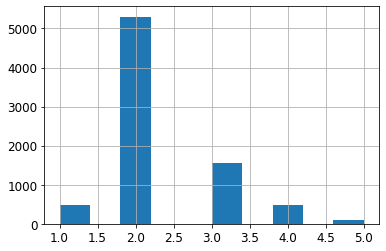

In [93]:
clean_car_details['max_power_cat'].value_counts()
clean_car_details['max_power_cat'].hist()

In [95]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(clean_car_details, clean_car_details['max_power_cat']):
    strat_train_set = new_car_details.loc[train_index]
    strat_test_set = new_car_details.loc[test_index]